<a href="https://colab.research.google.com/github/uvaishnav/ANN-practise/blob/main/Lenet_practise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)

(60000, 28, 28)


Normalize and Reshape data

In [ ]:
x_train=x_train/255.0
x_test=x_test/255.0
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

Define LENET Archetecture

In [ ]:
lenet_model=Sequential()

lenet_model.add(Conv2D(6,(5,5),strides=1,activation='relu',padding='same',input_shape=(28,28,1)))

#  6 @ 28 X 28

lenet_model.add(MaxPooling2D((2,2),strides=2))

# 6 @ 14 X 14

lenet_model.add(Conv2D(16,(5,5),strides=1,activation='relu'))

# 16 @ 10 X 10

lenet_model.add(MaxPooling2D((2,2),strides=2))

# 16 @ 5 X 5

lenet_model.add(Flatten())

# 400

lenet_model.add(Dense(120,activation='relu'))
lenet_model.add(Dense(84,activation='relu'))
lenet_model.add(Dense(10,activation="softmax"))

print(lenet_model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

Compile the Model

In [ ]:
lenet_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Train the model

In [ ]:
history=lenet_model.fit(
    x_train,
    y_train,
    epochs=10,
    validation_data=(x_test,y_test)
)

Epoch 1/10
1875/1875 [==============================] - 20s 4ms/step - loss: 0.6547 - accuracy: 0.7847 - val_loss: 0.2344 - val_accuracy: 0.9287
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2049 - accuracy: 0.9360 - val_loss: 0.1323 - val_accuracy: 0.9580
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1327 - accuracy: 0.9584 - val_loss: 0.1008 - val_accuracy: 0.9675
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1027 - accuracy: 0.9677 - val_loss: 0.0725 - val_accuracy: 0.9764
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0840 - accuracy: 0.9732 - val_loss: 0.0645 - val_accuracy: 0.9785
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0720 - accuracy: 0.9771 - val_loss: 0.0566 - val_accuracy: 0.9817
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0638 - accuracy: 0.9796 - val_loss: 0.0645 - val_accuracy

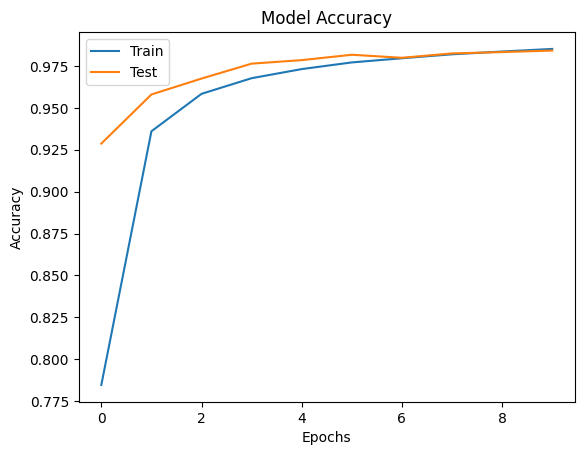

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.legend(['Train','Test'])
plt.show()

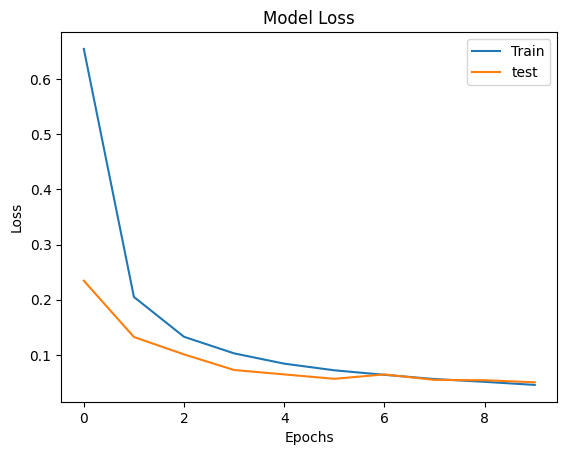

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss")
plt.legend(['Train',"test"])
plt.show()